<a href="https://colab.research.google.com/github/dfariba/Aggregated-Wind-Farm-Power-Prediction-using-CNN/blob/main/Aggregated_Wind_Farm_Power_Prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aggregated Wind Farm Power Production Located in Belgium
Source of data: www.elia.be

Two-Dimensional Convolutional Neural Network Model

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
from matplotlib import pyplot
import pandas as pd

In [ ]:
# Load dataset
df_power = pd.read_csv ('AggregatedWindFarm_Belgium.csv', header=0, parse_dates = [0])
data = df_power['Measured & upscaled [MW]']

In [ ]:
# normalize data
Ndata = (data - np.min(data, axis=0))/(np.max(data, axis=0) - np.min(data, axis=0))

# define parameter
p = 96;
k = 4;
D = round(data.shape[0]/p);

In [ ]:
# reshape data
power = Ndata.values.reshape (p, D,1)

X = np.zeros((power.shape[0], k, 1, D-k))

for i in range (0, D-k):
   X[:, :, :, i] = np.array(power[:, i:i+k,:])

power = Ndata.values.reshape (p, D)

y= np.zeros((power.shape[0], D-(k)))

for i in range (0, D-(k+1)):
   y[:, i]= np.array(power[:,i+(k+1)])

In [ ]:
# split train, test, and validation
sizeXtrain = round(D*0.7)
sizeXtest = D-sizeXtrain;
sizeXvalidation = round(sizeXtrain*0.15);

In [ ]:
# Restructuring data
X_train = X[:,:,:,0:sizeXtrain-k-1].reshape(sizeXtrain-k-1 ,p, k, 1);
X_test = X[:,:,:,X_train.shape[0]+1:(D-k)-1].reshape(sizeXtest-1 ,p, k, 1);
X_validation = X[:,:,:,0:sizeXvalidation-k-1].reshape(sizeXvalidation-k-1 ,p, k, 1);

y_train = y[:,0:sizeXtrain-k-1].T;
y_test = y[:,X_train.shape[0]+1:(D-k)-1].T;
y_validation=y[:,0:sizeXvalidation-k-1].T

In [ ]:
#define the model
model = keras.Sequential()

model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(p, k, 1)))

model.add(Conv2D(32, (2, 2), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.7))

# output a resgression
model.add(Dense(p, activation='linear'))

#model.summary()

In [ ]:
#compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss='mse',
              metrics=['mae', 'mse'])

In [ ]:
#train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=1024, validation_data=(X_validation, y_validation))

Epoch 1/1000
1/1 [==============================] - 1s 660ms/step - loss: 0.4242 - mae: 0.5491 - mse: 0.4242 - val_loss: 0.3424 - val_mae: 0.4950 - val_mse: 0.3424
Epoch 2/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3751 - mae: 0.5172 - mse: 0.3751 - val_loss: 0.3193 - val_mae: 0.4769 - val_mse: 0.3193
Epoch 3/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3503 - mae: 0.4978 - mse: 0.3503 - val_loss: 0.3010 - val_mae: 0.4621 - val_mse: 0.3010
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3383 - mae: 0.4881 - mse: 0.3383 - val_loss: 0.2833 - val_mae: 0.4470 - val_mse: 0.2833
Epoch 5/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3201 - mae: 0.4737 - mse: 0.3201 - val_loss: 0.2648 - val_mae: 0.4301 - val_mse: 0.2648
Epoch 6/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3134 - mae: 0.4673 - mse: 0.3134 - val_loss: 0.2454 - val_mae: 0.4120 - val_mse: 0.2454
Epoch 7/1000
1/1 [===

1/1 [==============================] - 0s 34ms/step - loss: 0.0880 - mae: 0.2331 - mse: 0.0880 - val_loss: 0.0342 - val_mae: 0.1412 - val_mse: 0.0342
Epoch 52/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0924 - mae: 0.2404 - mse: 0.0924 - val_loss: 0.0320 - val_mae: 0.1362 - val_mse: 0.0320
Epoch 53/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0823 - mae: 0.2268 - mse: 0.0823 - val_loss: 0.0281 - val_mae: 0.1269 - val_mse: 0.0281
Epoch 54/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0829 - mae: 0.2287 - mse: 0.0829 - val_loss: 0.0248 - val_mae: 0.1183 - val_mse: 0.0248
Epoch 55/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0780 - mae: 0.2210 - mse: 0.0780 - val_loss: 0.0220 - val_mae: 0.1107 - val_mse: 0.0220
Epoch 56/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0622 - mae: 0.1981 - mse: 0.0622 - val_loss: 0.0230 - val_mae: 0.1141 - val_mse: 0.0230
Epoch 57/1000
1/1 [===========

1/1 [==============================] - 0s 37ms/step - loss: 0.0585 - mae: 0.1883 - mse: 0.0585 - val_loss: 0.0098 - val_mae: 0.0745 - val_mse: 0.0098
Epoch 102/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0479 - mae: 0.1707 - mse: 0.0479 - val_loss: 0.0138 - val_mae: 0.0906 - val_mse: 0.0138
Epoch 103/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0491 - mae: 0.1722 - mse: 0.0491 - val_loss: 0.0196 - val_mae: 0.1090 - val_mse: 0.0196
Epoch 104/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0516 - mae: 0.1744 - mse: 0.0516 - val_loss: 0.0222 - val_mae: 0.1163 - val_mse: 0.0222
Epoch 105/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0471 - mae: 0.1675 - mse: 0.0471 - val_loss: 0.0191 - val_mae: 0.1077 - val_mse: 0.0191
Epoch 106/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0463 - mae: 0.1686 - mse: 0.0463 - val_loss: 0.0131 - val_mae: 0.0884 - val_mse: 0.0131
Epoch 107/1000
1/1 [=====

Epoch 151/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0347 - mae: 0.1443 - mse: 0.0347 - val_loss: 0.0076 - val_mae: 0.0624 - val_mse: 0.0076
Epoch 152/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0381 - mae: 0.1478 - mse: 0.0381 - val_loss: 0.0089 - val_mae: 0.0707 - val_mse: 0.0089
Epoch 153/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0323 - mae: 0.1396 - mse: 0.0323 - val_loss: 0.0102 - val_mae: 0.0772 - val_mse: 0.0102
Epoch 154/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0321 - mae: 0.1353 - mse: 0.0321 - val_loss: 0.0118 - val_mae: 0.0838 - val_mse: 0.0118
Epoch 155/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0297 - mae: 0.1322 - mse: 0.0297 - val_loss: 0.0128 - val_mae: 0.0876 - val_mse: 0.0128
Epoch 156/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0305 - mae: 0.1338 - mse: 0.0305 - val_loss: 0.0127 - val_mae: 0.0874 - val_mse: 0.0127
Epoch 157/

Epoch 201/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0252 - mae: 0.1177 - mse: 0.0252 - val_loss: 0.0112 - val_mae: 0.0817 - val_mse: 0.0112
Epoch 202/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0227 - mae: 0.1142 - mse: 0.0227 - val_loss: 0.0183 - val_mae: 0.1064 - val_mse: 0.0183
Epoch 203/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0318 - mae: 0.1359 - mse: 0.0318 - val_loss: 0.0192 - val_mae: 0.1091 - val_mse: 0.0192
Epoch 204/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0314 - mae: 0.1330 - mse: 0.0314 - val_loss: 0.0144 - val_mae: 0.0937 - val_mse: 0.0144
Epoch 205/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0326 - mae: 0.1357 - mse: 0.0326 - val_loss: 0.0089 - val_mae: 0.0704 - val_mse: 0.0089
Epoch 206/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0221 - mae: 0.1113 - mse: 0.0221 - val_loss: 0.0070 - val_mae: 0.0562 - val_mse: 0.0070
Epoch 207/

Epoch 251/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0278 - mae: 0.1256 - mse: 0.0278 - val_loss: 0.0110 - val_mae: 0.0808 - val_mse: 0.0110
Epoch 252/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0402 - mae: 0.1506 - mse: 0.0402 - val_loss: 0.0108 - val_mae: 0.0800 - val_mse: 0.0108
Epoch 253/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0236 - mae: 0.1142 - mse: 0.0236 - val_loss: 0.0103 - val_mae: 0.0776 - val_mse: 0.0103
Epoch 254/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0277 - mae: 0.1242 - mse: 0.0277 - val_loss: 0.0093 - val_mae: 0.0734 - val_mse: 0.0093
Epoch 255/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0256 - mae: 0.1210 - mse: 0.0256 - val_loss: 0.0084 - val_mae: 0.0688 - val_mse: 0.0084
Epoch 256/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0252 - mae: 0.1194 - mse: 0.0252 - val_loss: 0.0076 - val_mae: 0.0637 - val_mse: 0.0076
Epoch 257/

Epoch 301/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0243 - mae: 0.1181 - mse: 0.0243 - val_loss: 0.0074 - val_mae: 0.0629 - val_mse: 0.0074
Epoch 302/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0235 - mae: 0.1147 - mse: 0.0235 - val_loss: 0.0071 - val_mae: 0.0609 - val_mse: 0.0071
Epoch 303/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0186 - mae: 0.1023 - mse: 0.0186 - val_loss: 0.0065 - val_mae: 0.0553 - val_mse: 0.0065
Epoch 304/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0298 - mae: 0.1296 - mse: 0.0298 - val_loss: 0.0068 - val_mae: 0.0526 - val_mse: 0.0068
Epoch 305/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0243 - mae: 0.1177 - mse: 0.0243 - val_loss: 0.0075 - val_mae: 0.0577 - val_mse: 0.0075
Epoch 306/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0323 - mae: 0.1267 - mse: 0.0323 - val_loss: 0.0063 - val_mae: 0.0524 - val_mse: 0.0063
Epoch 307/

Epoch 351/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0219 - mae: 0.1089 - mse: 0.0219 - val_loss: 0.0095 - val_mae: 0.0672 - val_mse: 0.0095
Epoch 352/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0218 - mae: 0.1105 - mse: 0.0218 - val_loss: 0.0117 - val_mae: 0.0777 - val_mse: 0.0117
Epoch 353/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0262 - mae: 0.1163 - mse: 0.0262 - val_loss: 0.0099 - val_mae: 0.0693 - val_mse: 0.0099
Epoch 354/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0278 - mae: 0.1253 - mse: 0.0278 - val_loss: 0.0068 - val_mae: 0.0523 - val_mse: 0.0068
Epoch 355/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0317 - mae: 0.1274 - mse: 0.0317 - val_loss: 0.0080 - val_mae: 0.0654 - val_mse: 0.0080
Epoch 356/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0190 - mae: 0.1017 - mse: 0.0190 - val_loss: 0.0127 - val_mae: 0.0862 - val_mse: 0.0127
Epoch 357/

Epoch 401/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0219 - mae: 0.1063 - mse: 0.0219 - val_loss: 0.0069 - val_mae: 0.0584 - val_mse: 0.0069
Epoch 402/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0216 - mae: 0.1082 - mse: 0.0216 - val_loss: 0.0069 - val_mae: 0.0585 - val_mse: 0.0069
Epoch 403/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0116 - mae: 0.0805 - mse: 0.0116 - val_loss: 0.0068 - val_mae: 0.0582 - val_mse: 0.0068
Epoch 404/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0147 - mae: 0.0901 - mse: 0.0147 - val_loss: 0.0067 - val_mae: 0.0571 - val_mse: 0.0067
Epoch 405/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0222 - mae: 0.1075 - mse: 0.0222 - val_loss: 0.0065 - val_mae: 0.0553 - val_mse: 0.0065
Epoch 406/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0131 - mae: 0.0853 - mse: 0.0131 - val_loss: 0.0063 - val_mae: 0.0533 - val_mse: 0.0063
Epoch 407/

Epoch 451/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0155 - mae: 0.0862 - mse: 0.0155 - val_loss: 0.0074 - val_mae: 0.0624 - val_mse: 0.0074
Epoch 452/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0186 - mae: 0.1005 - mse: 0.0186 - val_loss: 0.0069 - val_mae: 0.0588 - val_mse: 0.0069
Epoch 453/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0150 - mae: 0.0901 - mse: 0.0150 - val_loss: 0.0063 - val_mae: 0.0535 - val_mse: 0.0063
Epoch 454/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0270 - mae: 0.1147 - mse: 0.0270 - val_loss: 0.0063 - val_mae: 0.0526 - val_mse: 0.0063
Epoch 455/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0109 - mae: 0.0780 - mse: 0.0109 - val_loss: 0.0062 - val_mae: 0.0517 - val_mse: 0.0062
Epoch 456/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0219 - mae: 0.1055 - mse: 0.0219 - val_loss: 0.0065 - val_mae: 0.0555 - val_mse: 0.0065
Epoch 457/

Epoch 501/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0175 - mae: 0.0949 - mse: 0.0175 - val_loss: 0.0064 - val_mae: 0.0540 - val_mse: 0.0064
Epoch 502/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0125 - mae: 0.0823 - mse: 0.0125 - val_loss: 0.0063 - val_mae: 0.0534 - val_mse: 0.0063
Epoch 503/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0198 - mae: 0.1013 - mse: 0.0198 - val_loss: 0.0066 - val_mae: 0.0559 - val_mse: 0.0066
Epoch 504/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0175 - mae: 0.0969 - mse: 0.0175 - val_loss: 0.0068 - val_mae: 0.0582 - val_mse: 0.0068
Epoch 505/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0125 - mae: 0.0828 - mse: 0.0125 - val_loss: 0.0075 - val_mae: 0.0632 - val_mse: 0.0075
Epoch 506/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0134 - mae: 0.0818 - mse: 0.0134 - val_loss: 0.0090 - val_mae: 0.0719 - val_mse: 0.0090
Epoch 507/

Epoch 551/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0107 - mae: 0.0758 - mse: 0.0107 - val_loss: 0.0061 - val_mae: 0.0504 - val_mse: 0.0061
Epoch 552/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0155 - mae: 0.0884 - mse: 0.0155 - val_loss: 0.0060 - val_mae: 0.0498 - val_mse: 0.0060
Epoch 553/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0149 - mae: 0.0888 - mse: 0.0149 - val_loss: 0.0061 - val_mae: 0.0517 - val_mse: 0.0061
Epoch 554/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0221 - mae: 0.1055 - mse: 0.0221 - val_loss: 0.0070 - val_mae: 0.0605 - val_mse: 0.0070
Epoch 555/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0163 - mae: 0.0893 - mse: 0.0163 - val_loss: 0.0092 - val_mae: 0.0730 - val_mse: 0.0092
Epoch 556/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0174 - mae: 0.0988 - mse: 0.0174 - val_loss: 0.0112 - val_mae: 0.0819 - val_mse: 0.0112
Epoch 557/

Epoch 601/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0186 - mae: 0.0977 - mse: 0.0186 - val_loss: 0.0062 - val_mae: 0.0520 - val_mse: 0.0062
Epoch 602/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0134 - mae: 0.0811 - mse: 0.0134 - val_loss: 0.0062 - val_mae: 0.0525 - val_mse: 0.0062
Epoch 603/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0122 - mae: 0.0775 - mse: 0.0122 - val_loss: 0.0062 - val_mae: 0.0534 - val_mse: 0.0062
Epoch 604/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0180 - mae: 0.0952 - mse: 0.0180 - val_loss: 0.0067 - val_mae: 0.0578 - val_mse: 0.0067
Epoch 605/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0134 - mae: 0.0813 - mse: 0.0134 - val_loss: 0.0075 - val_mae: 0.0640 - val_mse: 0.0075
Epoch 606/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0113 - mae: 0.0751 - mse: 0.0113 - val_loss: 0.0093 - val_mae: 0.0735 - val_mse: 0.0093
Epoch 607/

Epoch 651/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0161 - mae: 0.0920 - mse: 0.0161 - val_loss: 0.0060 - val_mae: 0.0519 - val_mse: 0.0060
Epoch 652/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0154 - mae: 0.0854 - mse: 0.0154 - val_loss: 0.0065 - val_mae: 0.0565 - val_mse: 0.0065
Epoch 653/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0159 - mae: 0.0924 - mse: 0.0159 - val_loss: 0.0070 - val_mae: 0.0607 - val_mse: 0.0070
Epoch 654/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0111 - mae: 0.0770 - mse: 0.0111 - val_loss: 0.0073 - val_mae: 0.0628 - val_mse: 0.0073
Epoch 655/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0128 - mae: 0.0815 - mse: 0.0128 - val_loss: 0.0073 - val_mae: 0.0625 - val_mse: 0.0073
Epoch 656/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0142 - mae: 0.0837 - mse: 0.0142 - val_loss: 0.0070 - val_mae: 0.0609 - val_mse: 0.0070
Epoch 657/

Epoch 701/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0141 - mae: 0.0859 - mse: 0.0141 - val_loss: 0.0067 - val_mae: 0.0582 - val_mse: 0.0067
Epoch 702/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0131 - mae: 0.0800 - mse: 0.0131 - val_loss: 0.0064 - val_mae: 0.0555 - val_mse: 0.0064
Epoch 703/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0172 - mae: 0.0944 - mse: 0.0172 - val_loss: 0.0062 - val_mae: 0.0541 - val_mse: 0.0062
Epoch 704/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0119 - mae: 0.0776 - mse: 0.0119 - val_loss: 0.0061 - val_mae: 0.0531 - val_mse: 0.0061
Epoch 705/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0119 - mae: 0.0781 - mse: 0.0119 - val_loss: 0.0060 - val_mae: 0.0517 - val_mse: 0.0060
Epoch 706/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0148 - mae: 0.0882 - mse: 0.0148 - val_loss: 0.0059 - val_mae: 0.0492 - val_mse: 0.0059
Epoch 707/

Epoch 751/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0095 - mae: 0.0692 - mse: 0.0095 - val_loss: 0.0062 - val_mae: 0.0518 - val_mse: 0.0062
Epoch 752/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0124 - mae: 0.0815 - mse: 0.0124 - val_loss: 0.0064 - val_mae: 0.0509 - val_mse: 0.0064
Epoch 753/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0102 - mae: 0.0723 - mse: 0.0102 - val_loss: 0.0067 - val_mae: 0.0518 - val_mse: 0.0067
Epoch 754/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0151 - mae: 0.0847 - mse: 0.0151 - val_loss: 0.0070 - val_mae: 0.0532 - val_mse: 0.0070
Epoch 755/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0131 - mae: 0.0811 - mse: 0.0131 - val_loss: 0.0071 - val_mae: 0.0540 - val_mse: 0.0071
Epoch 756/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0106 - mae: 0.0719 - mse: 0.0106 - val_loss: 0.0068 - val_mae: 0.0522 - val_mse: 0.0068
Epoch 757/

Epoch 801/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0104 - mae: 0.0712 - mse: 0.0104 - val_loss: 0.0062 - val_mae: 0.0550 - val_mse: 0.0062
Epoch 802/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0101 - mae: 0.0739 - mse: 0.0101 - val_loss: 0.0059 - val_mae: 0.0524 - val_mse: 0.0059
Epoch 803/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0102 - mae: 0.0680 - mse: 0.0102 - val_loss: 0.0057 - val_mae: 0.0496 - val_mse: 0.0057
Epoch 804/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0117 - mae: 0.0789 - mse: 0.0117 - val_loss: 0.0057 - val_mae: 0.0483 - val_mse: 0.0057
Epoch 805/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0161 - mae: 0.0895 - mse: 0.0161 - val_loss: 0.0057 - val_mae: 0.0478 - val_mse: 0.0057
Epoch 806/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0092 - mae: 0.0691 - mse: 0.0092 - val_loss: 0.0059 - val_mae: 0.0487 - val_mse: 0.0059
Epoch 807/

Epoch 851/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0101 - mae: 0.0713 - mse: 0.0101 - val_loss: 0.0065 - val_mae: 0.0576 - val_mse: 0.0065
Epoch 852/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0083 - mae: 0.0654 - mse: 0.0083 - val_loss: 0.0065 - val_mae: 0.0573 - val_mse: 0.0065
Epoch 853/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0114 - mae: 0.0743 - mse: 0.0114 - val_loss: 0.0064 - val_mae: 0.0564 - val_mse: 0.0064
Epoch 854/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0103 - mae: 0.0728 - mse: 0.0103 - val_loss: 0.0062 - val_mae: 0.0549 - val_mse: 0.0062
Epoch 855/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0089 - mae: 0.0664 - mse: 0.0089 - val_loss: 0.0060 - val_mae: 0.0530 - val_mse: 0.0060
Epoch 856/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0085 - mae: 0.0645 - mse: 0.0085 - val_loss: 0.0057 - val_mae: 0.0504 - val_mse: 0.0057
Epoch 857/

Epoch 901/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0085 - mae: 0.0660 - mse: 0.0085 - val_loss: 0.0063 - val_mae: 0.0555 - val_mse: 0.0063
Epoch 902/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0109 - mae: 0.0711 - mse: 0.0109 - val_loss: 0.0066 - val_mae: 0.0580 - val_mse: 0.0066
Epoch 903/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0126 - mae: 0.0798 - mse: 0.0126 - val_loss: 0.0067 - val_mae: 0.0589 - val_mse: 0.0067
Epoch 904/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0075 - mae: 0.0591 - mse: 0.0075 - val_loss: 0.0067 - val_mae: 0.0589 - val_mse: 0.0067
Epoch 905/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0087 - mae: 0.0660 - mse: 0.0087 - val_loss: 0.0066 - val_mae: 0.0583 - val_mse: 0.0066
Epoch 906/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0100 - mae: 0.0715 - mse: 0.0100 - val_loss: 0.0065 - val_mae: 0.0574 - val_mse: 0.0065
Epoch 907/

Epoch 951/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0104 - mae: 0.0695 - mse: 0.0104 - val_loss: 0.0054 - val_mae: 0.0456 - val_mse: 0.0054
Epoch 952/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0122 - mae: 0.0750 - mse: 0.0122 - val_loss: 0.0054 - val_mae: 0.0468 - val_mse: 0.0054
Epoch 953/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0067 - mae: 0.0586 - mse: 0.0067 - val_loss: 0.0055 - val_mae: 0.0486 - val_mse: 0.0055
Epoch 954/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0090 - mae: 0.0672 - mse: 0.0090 - val_loss: 0.0056 - val_mae: 0.0508 - val_mse: 0.0056
Epoch 955/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0061 - mae: 0.0566 - mse: 0.0061 - val_loss: 0.0058 - val_mae: 0.0529 - val_mse: 0.0058
Epoch 956/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0086 - mae: 0.0659 - mse: 0.0086 - val_loss: 0.0059 - val_mae: 0.0540 - val_mse: 0.0059
Epoch 957/

In [ ]:
# evaluate the model performance
mse, _, _ = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

1/1 [==============================] - 0s 21ms/step - loss: 0.0151 - mae: 0.0881 - mse: 0.0151
Root Mean Square Error on test set: 0.123


In [ ]:
# Making Prediction
yhat = model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


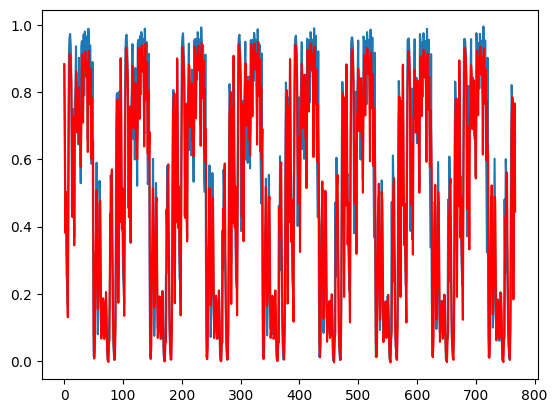

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(np.reshape(y_test,(96*8,1)))
pyplot.plot(np.reshape(yhat,(96*8,1)), color='red')